In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

archive/olist_sellers_dataset.csv
archive/product_category_name_translation.csv
archive/olist_orders_dataset.csv
archive/olist_order_items_dataset.csv
archive/olist_customers_dataset.csv
archive/olist_geolocation_dataset.csv
archive/olist_order_payments_dataset.csv
archive/olist_order_reviews_dataset.csv
archive/olist_products_dataset.csv


In [2]:

df_customer = pd.read_csv('archive/olist_customers_dataset.csv')
df_sellers = pd.read_csv('archive/olist_sellers_dataset.csv')
df_items = pd.read_csv('archive/olist_order_items_dataset.csv')
df_orders = pd.read_csv('archive/olist_orders_dataset.csv')
df_products = pd.read_csv('archive/olist_products_dataset.csv')
df_category_translation = pd.read_csv('archive/product_category_name_translation.csv')
df_order_payments = pd.read_csv('archive/olist_order_payments_dataset.csv')
df_order_reviews= pd.read_csv('archive/olist_order_reviews_dataset.csv')
df_geolocation= pd.read_csv('archive/olist_geolocation_dataset.csv')




In [3]:
#df_category_translation.head()
df_category_translation.shape[0]


71

In [4]:
order_orderitem = df_orders.merge(df_items, how="inner", on="order_id")


In [5]:
df_products_english=df_products.merge(df_category_translation, how="inner", on="product_category_name")
df_products_english

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery
...,...,...,...,...,...,...,...,...,...,...
32323,13b25797ad1e6d6c7cd3cbeb35f8ee7a,moveis_colchao_e_estofado,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery
32324,dc36a7859b743d8610a2bbbaea26ece9,moveis_colchao_e_estofado,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery
32325,107fde0930956120d1e13dd1062fbb46,moveis_colchao_e_estofado,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery
32326,726b4e18f00255e2e63491bcba3f60b8,moveis_colchao_e_estofado,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery


In [6]:
order_list_with_product_category=order_orderitem.merge(df_products_english,how="inner",on="product_id")

In [7]:
order_list_with_product_category.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,...,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery


In [8]:
pd.set_option('display.max_rows', None)

category_counts = order_list_with_product_category['product_category_name_english'].value_counts()
print(category_counts)


bed_bath_table                             11115
health_beauty                               9670
sports_leisure                              8641
furniture_decor                             8334
computers_accessories                       7827
housewares                                  6964
watches_gifts                               5991
telephony                                   4545
garden_tools                                4347
auto                                        4235
toys                                        4117
cool_stuff                                  3796
perfumery                                   3419
baby                                        3065
electronics                                 2767
stationery                                  2517
fashion_bags_accessories                    2031
pet_shop                                    1947
office_furniture                            1691
consoles_games                              1137
luggage_accessories 

In [9]:
total_counts = len(order_list_with_product_category)

# Convert value counts to percentages
percentages = round(category_counts / total_counts * 100,2)
percentages

bed_bath_table                             10.01
health_beauty                               8.71
sports_leisure                              7.78
furniture_decor                             7.51
computers_accessories                       7.05
housewares                                  6.27
watches_gifts                               5.40
telephony                                   4.09
garden_tools                                3.92
auto                                        3.81
toys                                        3.71
cool_stuff                                  3.42
perfumery                                   3.08
baby                                        2.76
electronics                                 2.49
stationery                                  2.27
fashion_bags_accessories                    1.83
pet_shop                                    1.75
office_furniture                            1.52
consoles_games                              1.02
luggage_accessories 

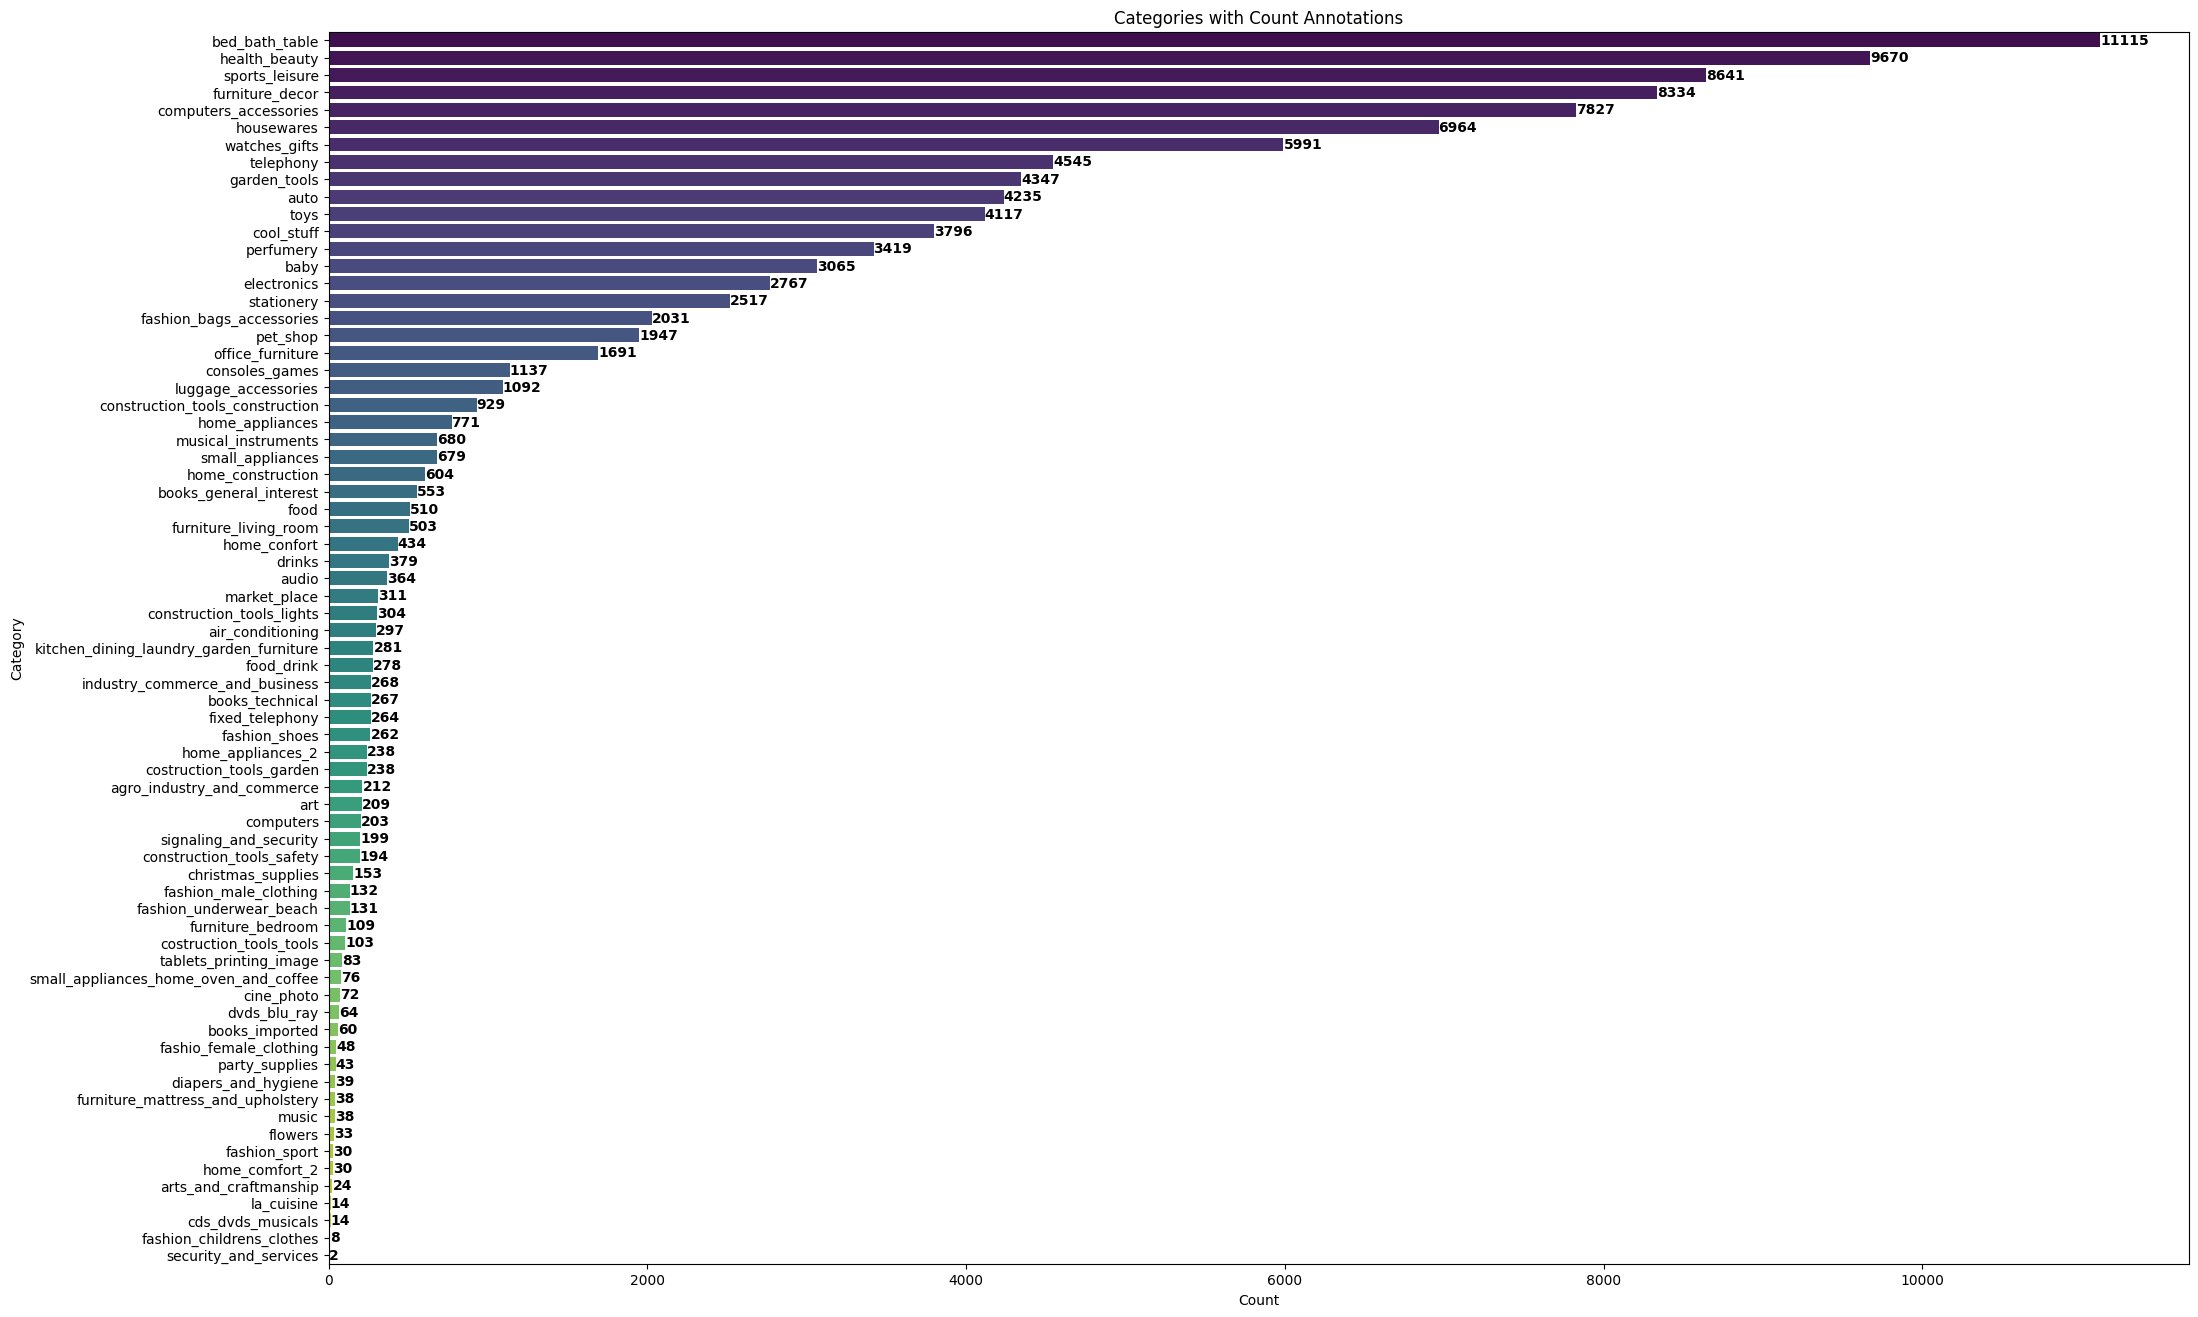

<Figure size 640x480 with 0 Axes>

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(24, 16))
ax = sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")

# Add count annotations on each bar
for i, value in enumerate(category_counts.values):
    ax.text(value, i, f'{value}', va = 'center', color = 'black', fontweight = 'bold')

# Set labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Category')
ax.set_title('Categories with Count Annotations')

# Show the plot
plt.show()
plt.savefig('barplot.png')


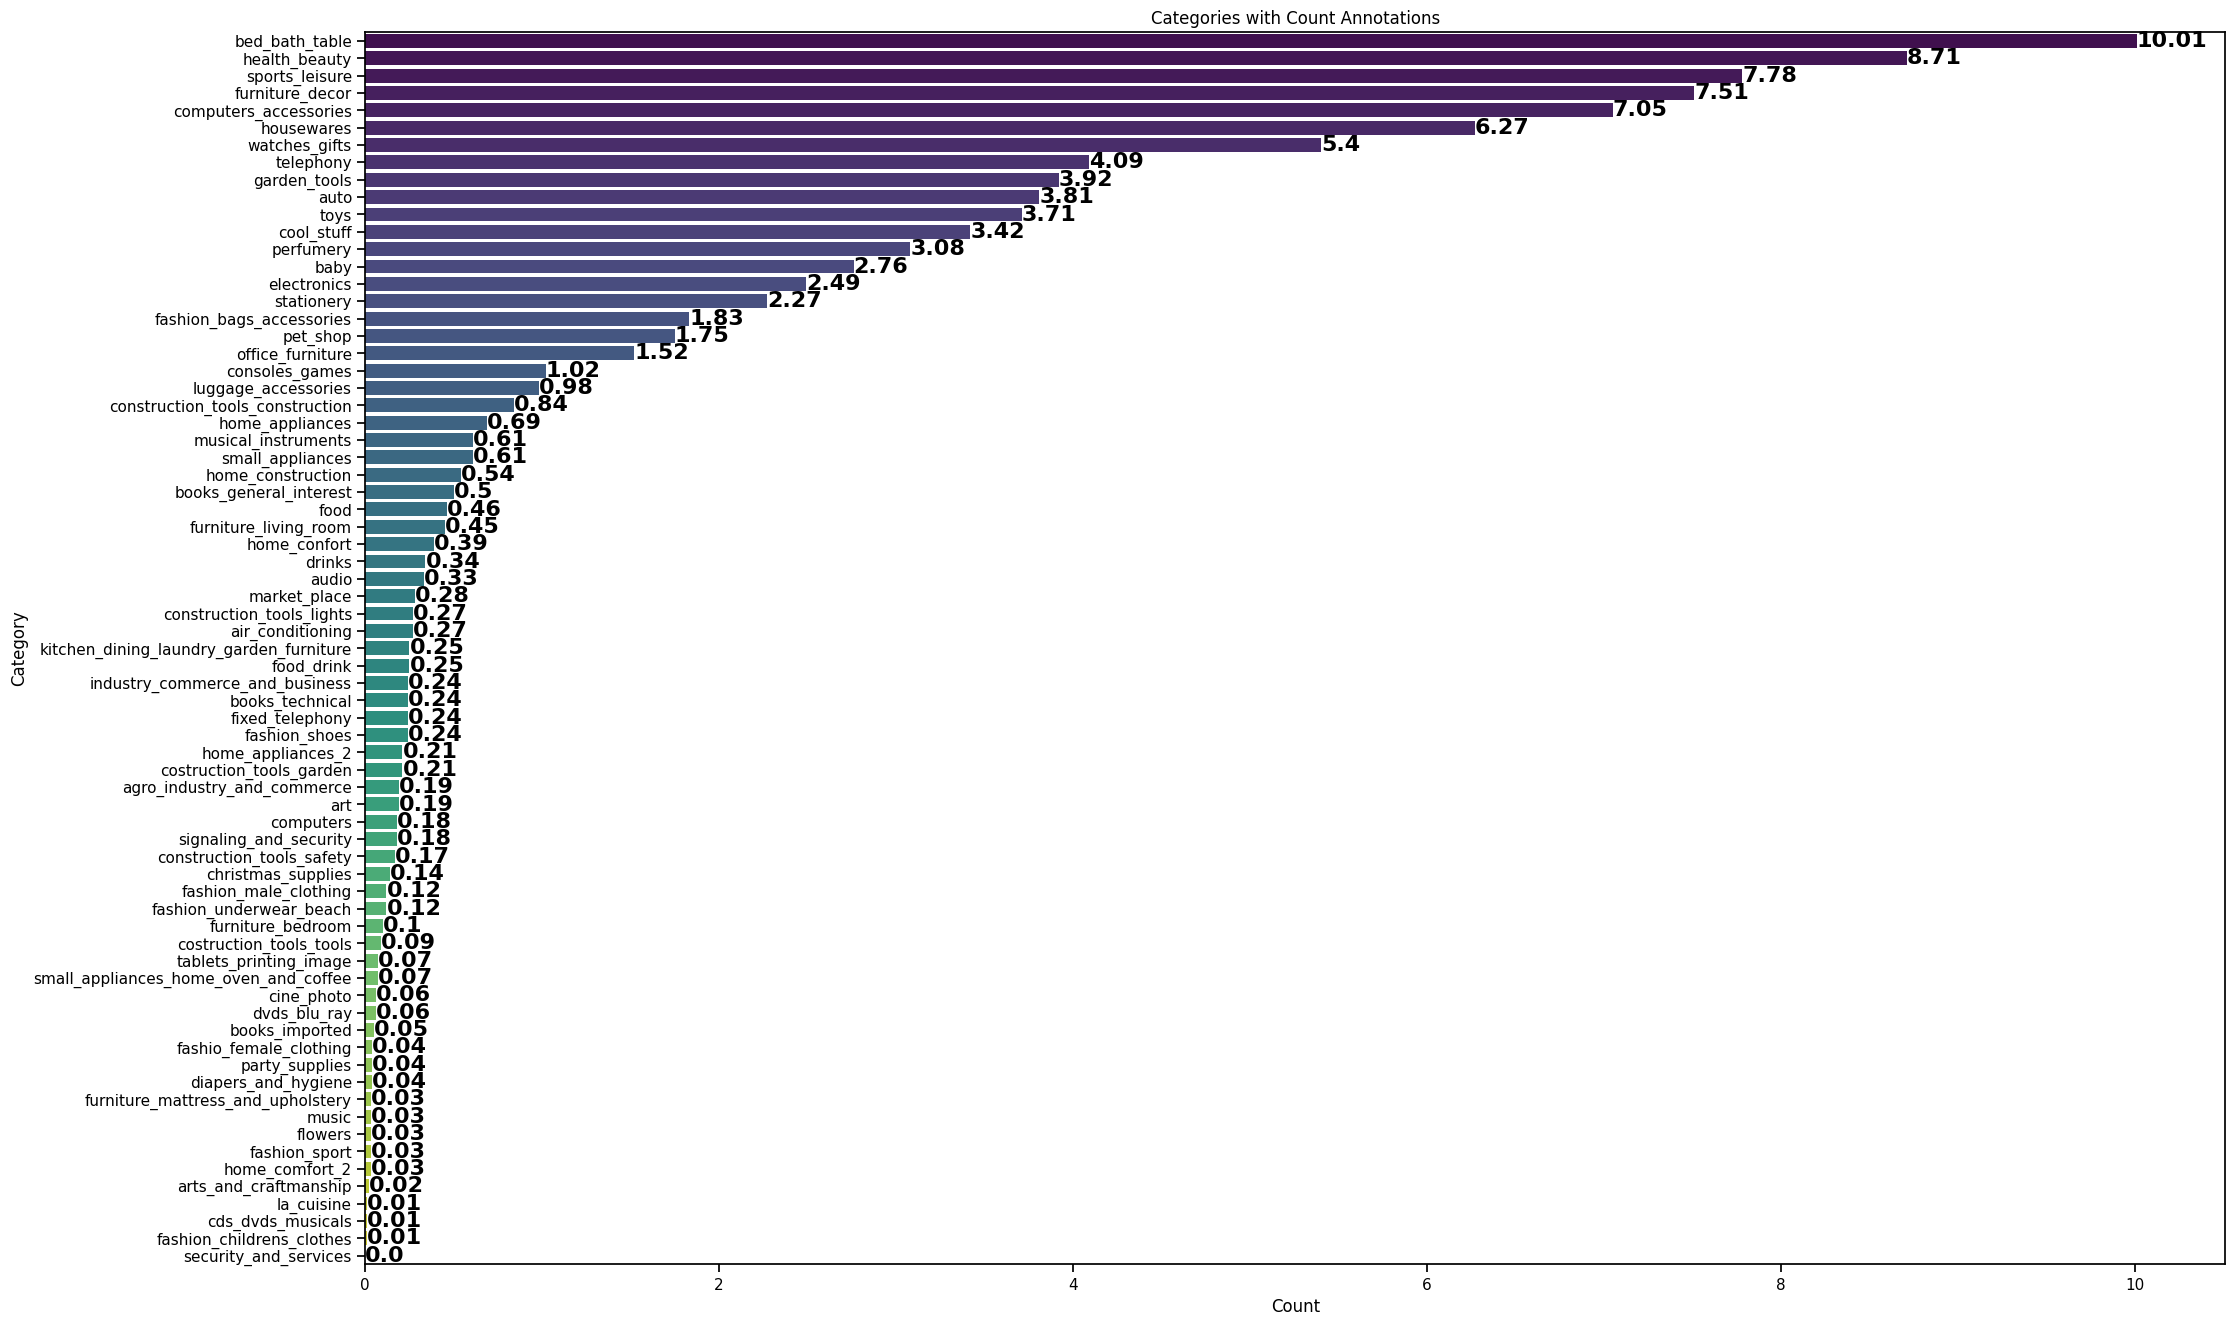

<Figure size 640x480 with 0 Axes>

In [11]:
import seaborn as sns

plt.figure(figsize=(24, 16))
sns.set_context("notebook", font_scale=1.0, rc={"font.size":16,"axes.labelsize":12})

ax = sns.barplot(x=percentages.values, y=percentages.index, palette="viridis")

# Add count annotations on each bar
for i, value in enumerate(percentages.values):
    ax.text(value, i, f'{value}', va = 'center', color = 'black', fontweight = 'bold')

# Set labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Category')
ax.set_title('Categories with Count Annotations')

# Show the plot
plt.show()
plt.savefig('barplot.png')


## Column statistics from the data frame

In [12]:
df = order_list_with_product_category
metrics = {
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique(),
    'Top Value': df.mode().iloc[0],
    'Data Type': df.dtypes
}

# For numeric columns, we can add more statistics:
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_metrics = {
    'Mean': df[numeric_cols].mean(),
    'Median': df[numeric_cols].median(),
    'Standard Deviation': df[numeric_cols].std(),
    'Minimum': df[numeric_cols].min(),
    'Maximum': df[numeric_cols].max(),
    'Zeros Count': (df[numeric_cols] == 0).sum()
}

# Combine all the metrics
all_metrics = {**metrics, **numeric_metrics}

# Create the data quality DataFrame
dq_df = pd.DataFrame(all_metrics)

# Display the data quality DataFrame
print(dq_df)

                               Missing Values  Unique Values  \
customer_id                                 0          97256   
freight_value                               0           6977   
order_approved_at                          14          88964   
order_delivered_carrier_date             1155          79802   
order_delivered_customer_date            2386          94337   
order_estimated_delivery_date               0            450   
order_id                                    0          97256   
order_item_id                               0             21   
order_purchase_timestamp                    0          96721   
order_status                                0              7   
price                                       0           5899   
product_category_name                       0             71   
product_category_name_english               0             71   
product_description_lenght                  0           2960   
product_height_cm                       

### Working with dates


## Question 1: Top 10 categories Month over month

In [13]:
df['date'] = pd.to_datetime(df['order_purchase_timestamp'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
category_counts = df.groupby(['year', 'month', 'product_category_name_english']).size().reset_index(name='count')
category_counts = category_counts.sort_values(by=['year', 'month', 'count'], ascending=[True, True, False])

top5_categories_by_year_month = {}
unique_year_months = df[['year', 'month']].drop_duplicates().sort_values(by=['year', 'month'])
for index, row in unique_year_months.iterrows():
    year, month = row['year'], row['month']
    top5_categories = category_counts[(category_counts['year'] == year) & (category_counts['month'] == month)].head(10)
    top5_categories_by_year_month[(year, month)] = top5_categories

# Print the top 5 categories for each combination of year and month
for (year, month), top5_categories in top5_categories_by_year_month.items():
    print(f"Year {year}, Month {month}:")
    print(top5_categories)

Year 2016, Month 9:
   year  month product_category_name_english  count
1  2016      9                 health_beauty      3
0  2016      9               furniture_decor      2
2  2016      9                     telephony      1
Year 2016, Month 10:
    year  month product_category_name_english  count
21  2016     10               furniture_decor     67
23  2016     10                 health_beauty     48
28  2016     10                     perfumery     33
32  2016     10                          toys     27
10  2016     10         computers_accessories     21
30  2016     10                sports_leisure     19
6   2016     10                          baby     14
26  2016     10                  market_place     13
5   2016     10                          auto     12
24  2016     10                    housewares     12
Year 2016, Month 12:
    year  month product_category_name_english  count
34  2016     12      fashion_bags_accessories      1
Year 2017, Month 1:
    year  month produ

In [14]:
start_date = df['date'].min()
end_date = df['date'].max()

print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")

Start Date: 2016-09-04 21:15:19
End Date: 2018-09-03 09:06:57


## Question 2: Revenue generated over regions with best and worst regions 

In [15]:
df = df_customer
metrics = {
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique(),
    'Top Value': df.mode().iloc[0],
    'Data Type': df.dtypes
}

# For numeric columns, we can add more statistics:
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_metrics = {
    'Mean': df[numeric_cols].mean(),
    'Median': df[numeric_cols].median(),
    'Standard Deviation': df[numeric_cols].std(),
    'Minimum': df[numeric_cols].min(),
    'Maximum': df[numeric_cols].max(),
    'Zeros Count': (df[numeric_cols] == 0).sum()
}

# Combine all the metrics
all_metrics = {**metrics, **numeric_metrics}

# Create the data quality DataFrame
dq_df = pd.DataFrame(all_metrics)

# Display the data quality DataFrame
print(dq_df)

                          Missing Values  Unique Values  \
customer_city                          0           4119   
customer_id                            0          99441   
customer_state                         0             27   
customer_unique_id                     0          96096   
customer_zip_code_prefix               0          14994   

                                                 Top Value Data Type  \
customer_city                                    sao paulo    object   
customer_id               00012a2ce6f8dcda20d059ce98491703    object   
customer_state                                          SP    object   
customer_unique_id        8d50f5eadf50201ccdcedfb9e2ac8455    object   
customer_zip_code_prefix                           22790.0     int64   

                                  Mean   Median  Standard Deviation  Minimum  \
customer_city                      NaN      NaN                 NaN      NaN   
customer_id                        NaN      NaN     

In [16]:
order_list_with_product_category_customers=order_list_with_product_category.merge(df_customer,how="inner",on="customer_id")
order_list_with_product_category_customers
merged_df_Q2 = pd.merge(order_list_with_product_category_customers, df_geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
merged_df_payments_Q2=merged_df_Q2.merge(df_order_payments,how="inner",on="order_id")
#order_list_with_product_category_sellers_geolocation=order_list_with_product_category_sellers.merge(df_geolocation,how="inner",on="zip_code_prefix")
#payments_order_list_with_product_category_sellers_geolocation=order_list_with_product_category_sellers_geolocation.merge(df_order_payments,how="inner",on="order_id")

In [17]:
exchange_rate_brl_to_eur = 0.19  # 1 BRL = 0.21 EUR (example rate)
merged_df_payments_Q2['payment_value_eur'] = merged_df_payments_Q2['payment_value'] * exchange_rate_brl_to_eur
merged_df_payments_Q2['payment_value_eur_million'] = merged_df_payments_Q2['payment_value_eur']/1000000

In [18]:
grouped_by_city=merged_df_payments_Q2.groupby("geolocation_city")


In [19]:

revenue_by_category = grouped_by_city['payment_value_eur_million'].sum()


top5_categories_by_revenue = revenue_by_category.nlargest(10)

# Find the bottom five categories by revenue
bottom5_categories_by_revenue = revenue_by_category.nsmallest(10)

# Display the top and bottom categories by revenue
print("Top Five Categories by Revenue (in million Euros):")
print(top5_categories_by_revenue)

print("\nBottom Five Categories by Revenue (in million Euros):")
print(bottom5_categories_by_revenue)


Top Five Categories by Revenue (in million Euros):
geolocation_city
rio de janeiro    81.382084
sao paulo         39.995600
belo horizonte    26.017901
niteroi           15.408870
curitiba           9.891637
santos             9.639429
porto alegre       9.367488
salvador           7.538481
divinopolis        7.383274
são paulo          7.127049
Name: payment_value_eur_million, dtype: float64

Bottom Five Categories by Revenue (in million Euros):
geolocation_city
érico cardoso           0.000005
planaltina do paraná    0.000005
leópolis                0.000006
boa ventura             0.000006
tuparece                0.000006
aparecida doeste        0.000006
união da serra          0.000006
jardim abc de goias     0.000006
brejolândia             0.000007
pinhal da serra         0.000007
Name: payment_value_eur_million, dtype: float64


## Question 3: Revenue generated by the cities from each category

In [20]:
grouped = grouped_category_in_cities.sort_values(by=['geolocation_city', 'payment_value_eur'], ascending=[True, False])

NameError: name 'grouped_category_in_cities' is not defined

In [ ]:
revenue_per_category_city = merged_df_payments_Q2.groupby(['geolocation_city', 'product_category_name_english'])['payment_value_eur'].sum().reset_index()

# Step 2: Sort the results and group them by city to get the top 5 categories per city
top_categories_per_city = (revenue_per_category_city.sort_values(['geolocation_city', 'payment_value_eur'], ascending=[True, False])
                                                       .groupby('geolocation_city').head(5))

# Step 3: Get the top 5 cities based on overall revenue
top_cities = merged_df_payments_Q2.groupby('geolocation_city')['payment_value_eur'].sum().sort_values(ascending=False).head(5).index

# Step 4: Filter out the top categories for the top 5 cities
top_categories_in_top_cities = top_categories_per_city[top_categories_per_city['geolocation_city'].isin(top_cities)]

# Step 5: Display the results
print(top_categories_in_top_cities)


      geolocation_city product_category_name_english  payment_value_eur
3505    belo horizonte                 health_beauty       2.718900e+06
3474    belo horizonte                bed_bath_table       2.394899e+06
3501    belo horizonte               furniture_decor       2.144257e+06
3480    belo horizonte         computers_accessories       2.123818e+06
3511    belo horizonte                    housewares       1.896722e+06
9366          curitiba                 watches_gifts       1.094765e+06
9342          curitiba                 health_beauty       9.838128e+05
9361          curitiba                sports_leisure       8.555081e+05
9321          curitiba         computers_accessories       7.935292e+05
9339          curitiba               furniture_decor       7.845687e+05
21211          niteroi                 watches_gifts       1.882595e+06
21171          niteroi         computers_accessories       1.766679e+06
21187          niteroi               furniture_decor       1.338

## Question 4: Revenue trend over each month

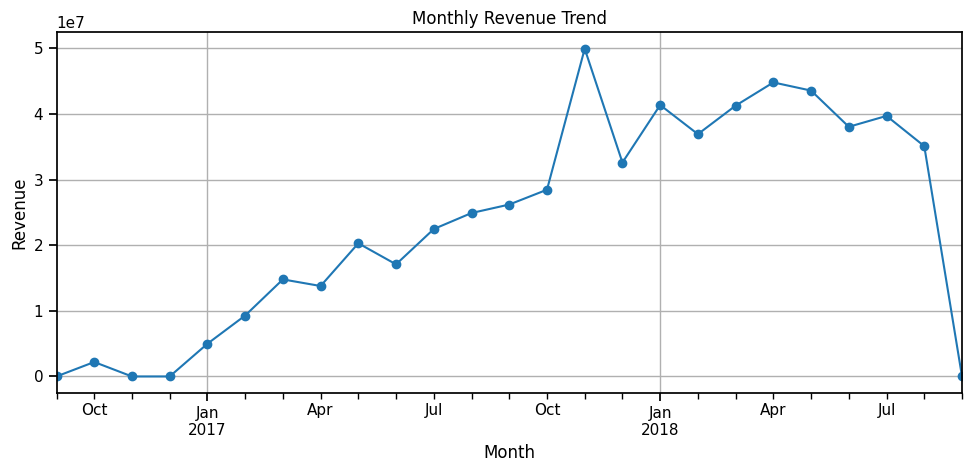

In [ ]:

merged_df_payments_Q2['date'] = pd.to_datetime(merged_df_payments_Q2['order_purchase_timestamp'])
merged_df_payments_Q2.set_index('date', inplace=True)

monthly_revenue = merged_df_payments_Q2['payment_value_eur'].resample('M').sum()

# Step 4: Plot the trend
plt.figure(figsize=(10, 5))
monthly_revenue.plot(marker='o', linestyle='-')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
merged_df_payments_Q2_reviews=merged_df_payments_Q2.merge(df_order_reviews,how="inner",on="order_id")



In [ ]:
df = df_order_payments
metrics = {
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique(),
    'Top Value': df.mode().iloc[0],
    'Data Type': df.dtypes
}

# For numeric columns, we can add more statistics:
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_metrics = {
    'Mean': df[numeric_cols].mean(),
    'Median': df[numeric_cols].median(),
    'Standard Deviation': df[numeric_cols].std(),
    'Minimum': df[numeric_cols].min(),
    'Maximum': df[numeric_cols].max(),
    'Zeros Count': (df[numeric_cols] == 0).sum()
}

# Combine all the metrics
all_metrics = {**metrics, **numeric_metrics}

# Create the data quality DataFrame
dq_df = pd.DataFrame(all_metrics)

# Display the data quality DataFrame
print(dq_df)

                      Missing Values  Unique Values  \
order_id                           0          99440   
payment_installments               0             24   
payment_sequential                 0             29   
payment_type                       0              5   
payment_value                      0          29077   

                                             Top Value Data Type        Mean  \
order_id              fa65dad1b0e818e3ccc5cb0e39231352    object         NaN   
payment_installments                                 1     int64    2.853349   
payment_sequential                                   1     int64    1.092679   
payment_type                               credit_card    object         NaN   
payment_value                                     50.0   float64  154.100380   

                      Median  Standard Deviation  Minimum   Maximum  \
order_id                 NaN                 NaN      NaN       NaN   
payment_installments     1.0            2.6870

## Question 5: Is there a correlation between the reviews and the revenue?

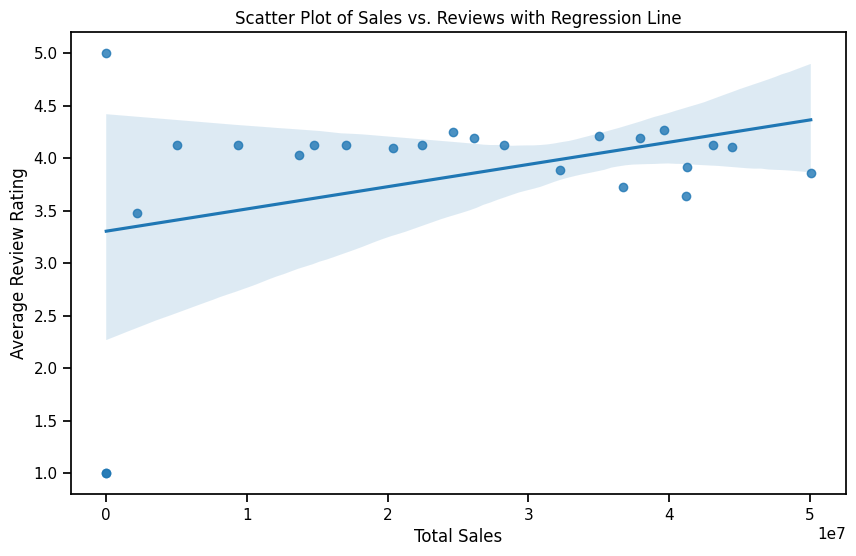

'\n# Calculate the correlation\ncorrelation, p_value = pearsonr(sales_trend, reviews_trend)\n\nprint(f"Correlation coefficient: {correlation}")\nprint(f"P-value: {p_value}")\n'

In [ ]:
merged_df_payments_Q2_reviews['date'] = pd.to_datetime(merged_df_payments_Q2_reviews['order_purchase_timestamp'])
merged_df_payments_Q2_reviews.set_index('date', inplace=True)

sales_trend = merged_df_payments_Q2_reviews['payment_value_eur'].resample('M').sum()  # Example for monthly sales

# Aggregate reviews by the same time period
reviews_trend = merged_df_payments_Q2_reviews['review_score'].resample('M').mean()  # Example for monthly average review

# Ensure both trends have the same length and corresponding indices
common_index = sales_trend.index.intersection(reviews_trend.index)
sales_trend = sales_trend.loc[common_index]
reviews_trend = reviews_trend.loc[common_index]
plt.figure(figsize=(10, 6))
sns.regplot(x=sales_trend, y=reviews_trend)
plt.title('Scatter Plot of Sales vs. Reviews with Regression Line')
plt.xlabel('Total Sales')
plt.ylabel('Average Review Rating')
plt.show()
"""
# Calculate the correlation
correlation, p_value = pearsonr(sales_trend, reviews_trend)

print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")
"""

In [ ]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
